# Predictions based on second vector

In [7]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt


## Parameters:
* Season
* Stage
* Date
* WIN DRAW LOOSE

BOTH TEAMS:
* Age
* TMV (Total Market Value)
* buildUpPlaySpeed
* buildUpPlayPassing
* chanceCreationShooting
* defencePressure
* buildUpPlayDribbling
* chanceCreationPassing
* chanceCreationCrossing
* defenceAggression
* defenceTeamWidth

[parameteres from FIFA - description](http://www.fifplay.com/fifa-17-tactics/)


In [8]:
match2 = pd.read_csv('learning_vectors/v02/version02-FIFAtransfermarkt.csv', sep=',')
match2 = match2.set_index(['Match_id'])

match2 = match2.sort_values(['League_id', 'Date'])
match2.columns = ['League_id', 'Season', 'Stage', 'Date', 'H_team', 'A_team', 'Result',
                  'H_Speed', 'H_Pass', 'H_Shoot', 'H_Pressure', 'H_chPass', 'H_chCross', 'H_dAggr', 'H_dWidth',
                  'A_Speed', 'A_Pass', 'A_Shoot', 'A_Pressure', 'A_chPass', 'A_chCross', 'A_dAggr', 'A_dWidth',
                  'H_age', 'A_age',
                  'H_TMV', 'A_TMV']
match2.head()


,League_id,Season,Stage,Date,H_team,A_team,Result,H_Speed,H_Pass,H_Shoot,...,A_Shoot,A_Pressure,A_chPass,A_chCross,A_dAggr,A_dWidth,H_age,A_age,H_TMV,A_TMV
Match_id,,,,,,,,,,,,,,,,,,,,,
1730,1729,2008/2009,1,2008-08-16,Arsenal,West Bromwich Albion,0,66,30,35,...,55,70,70,70,70,70,21.3,24.6,250.0,64.0
1731,1729,2008/2009,1,2008-08-16,Sunderland,Liverpool,2,60,70,55,...,70,40,50,60,60,40,24.9,23.9,91.0,257.0
1732,1729,2008/2009,1,2008-08-16,West Ham United,Wigan Athletic,0,58,30,50,...,50,35,70,70,70,35,24.3,25.7,80.0,61.0
1734,1729,2008/2009,1,2008-08-16,Everton,Blackburn Rovers,2,60,65,45,...,55,45,60,70,70,45,24.4,26.4,162.0,86.0
1735,1729,2008/2009,1,2008-08-16,Middlesbrough,Tottenham Hotspur,0,70,70,50,...,50,50,50,65,50,50,22.3,22.5,73.0,212.0


In [9]:
#Check for nulls
print(match2.isnull().sum())
match2.isnull().any().any()


League_id     0
Season        0
Stage         0
Date          0
H_team        0
A_team        0
Result        0
H_Speed       0
H_Pass        0
H_Shoot       0
H_Pressure    0
H_chPass      0
H_chCross     0
H_dAggr       0
H_dWidth      0
A_Speed       0
A_Pass        0
A_Shoot       0
A_Pressure    0
A_chPass      0
A_chCross     0
A_dAggr       0
A_dWidth      0
H_age         0
A_age         0
H_TMV         0
A_TMV         0
dtype: int64

## Different algorithms comparison

Alg/res.mean/res.std
LR: 0.534539 (0.020482)
LDA: 0.533224 (0.011218)
KNN: 0.488487 (0.003306)
CART: 0.422204 (0.005836)
NB: 0.498026 (0.007630)
SVM: 0.473191 (0.013630)


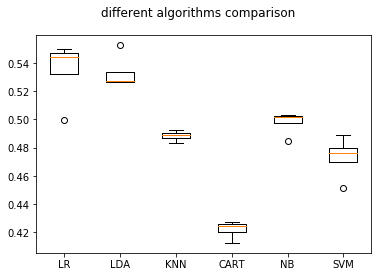

In [11]:
predictors = ['H_Speed', 'H_Pass', 'H_Shoot', 'H_Pressure', 'H_chPass', 'H_chCross', 'H_dAggr', 'H_dWidth',
              'A_Speed', 'A_Pass', 'A_Shoot', 'A_Pressure', 'A_chPass', 'A_chCross', 'A_dAggr', 'A_dWidth',
              'H_age', 'A_age',
              'H_TMV', 'A_TMV']

X = match2[predictors]
y = match2['Result']

algs = []
algs.append(('LR', LogisticRegression()))
algs.append(('LDA', LinearDiscriminantAnalysis()))
algs.append(('KNN', KNeighborsClassifier()))
algs.append(('CART', DecisionTreeClassifier()))
algs.append(('NB', GaussianNB()))
algs.append(('SVM', SVC()))

results = []
names = []
print ("Alg/res.mean/res.std")
for name, model in algs:
    cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
    res = model_selection.cross_val_score(model, X, y,
                                          cv=cross_validator,
                                          scoring='accuracy')
    results.append(res)
    names.append(name)
    info = "%s: %f (%f)" % (name, res.mean(), res.std())
    print(info)

fig = plt.figure()
fig.suptitle('different algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


Alg/res.mean/res.std
LR: 0.534375 (0.005393)
LDA: 0.535033 (0.010458)
KNN: 0.470066 (0.008354)
CART: 0.414145 (0.005894)
NB: 0.524178 (0.007817)
SVM: 0.461678 (0.006906)


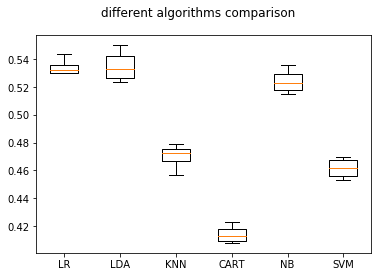

In [12]:
predictors = ['H_age', 'A_age', 'H_TMV', 'A_TMV']

X = match2[predictors]
y = match2['Result']

algs = []
algs.append(('LR', LogisticRegression()))
algs.append(('LDA', LinearDiscriminantAnalysis()))
algs.append(('KNN', KNeighborsClassifier()))
algs.append(('CART', DecisionTreeClassifier()))
algs.append(('NB', GaussianNB()))
algs.append(('SVM', SVC()))

results = []
names = []
print ("Alg/res.mean/res.std")
for name, model in algs:
    cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
    res = model_selection.cross_val_score(model, X, y,
                                          cv=cross_validator,
                                          scoring='accuracy')
    results.append(res)
    names.append(name)
    info = "%s: %f (%f)" % (name, res.mean(), res.std())
    print(info)

fig = plt.figure()
fig.suptitle('different algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
